Modules

In [88]:
# Import modules
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from cenpy import products
import matplotlib.pyplot as plt
import seaborn as sns

Set Up

In [2]:
# Define product
acs = products.ACS(2019)

**View a new census table**
https://api.census.gov/data/2019/acs/acs5/variables.html

In [3]:
# Download data
    # the v list is a list of the names of variables you want to input that then goes into the data pull
    # the level is 
v = []
counter = 1
while counter < 10:
    col = 'B08012_00'+str(counter)+'E'
    v.append(col)
    counter += 1

while counter < 40:
    col = 'B08012_0'+str(counter)+'E'
    v.append(col)
    counter += 1
    
v.append('B08013_001E')
v.append('B08013_002E')
v.append('B08013_003E')

In [4]:
new_table = products.ACS(2019).from_county('Harris County, TX', level='tract', variables=v)

C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter i

In [5]:
# Calculate stats for the new data for a given column
new_table.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 14 entries, 0 to 13
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   GEOID        14 non-null     object  
 1   geometry     14 non-null     geometry
 2   B08012_001E  14 non-null     float64 
 3   B08012_002E  14 non-null     float64 
 4   B08012_003E  14 non-null     float64 
 5   B08012_004E  14 non-null     float64 
 6   B08012_005E  14 non-null     float64 
 7   B08012_006E  14 non-null     float64 
 8   B08012_007E  14 non-null     float64 
 9   B08012_008E  14 non-null     float64 
 10  B08012_009E  14 non-null     float64 
 11  B08012_010E  14 non-null     float64 
 12  B08012_011E  14 non-null     float64 
 13  B08012_012E  14 non-null     float64 
 14  B08012_013E  14 non-null     float64 
 15  B08012_014E  14 non-null     float64 
 16  B08012_015E  14 non-null     float64 
 17  B08012_016E  14 non-null     float64 
 18  B08012_017E  14 non-null

In [6]:
new_table['B08013_001E'].sum()

597665.0

In [7]:
new_table['B08013_002E'].sum()

343800.0

In [8]:
new_table['B08013_003E'].sum()

253860.0

*Important Data*: men have 343800 aggregate travel hours, as opposed to women's 253860.

<AxesSubplot:>

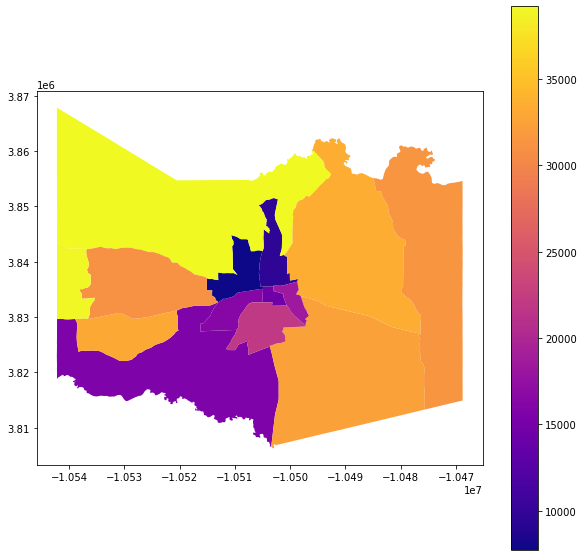

In [9]:
# Plot map of a given column
f, ax = plt.subplots(1, 1, figsize=(10,10))
new_table.plot('B08013_002E', ax=ax, cmap='plasma', legend=True)

<AxesSubplot:>

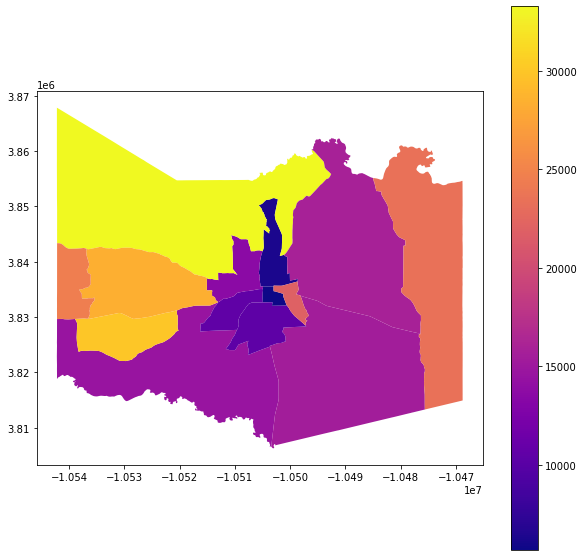

In [10]:
# Plot map of a given column
f, ax = plt.subplots(1, 1, figsize=(10,10))
new_table.plot('B08013_003E', ax=ax, cmap='plasma', legend=True)

Columns of note:
B08012_001E = Total number of people polled per tract
B08012_014E = Total number of men per tract
B08012_027E = Total number of women per tract
B08012_012E + B08012_013E = Total numer of workers with a travel time > 60 minutes
B08012_025E + B08012_026E = Total numer of men with a travel time > 60 minutes
B08012_038E + B08012_039E = Total numer of women with a travel time > 60 minutes
B08013_001E = Aggregate travel hours
B08013_002E = Men's aggregate travel hours
B08013_003E = Men's aggregate travel hours

**Gather relevant information**

Base Variables:

In [11]:
base = pd.DataFrame()

def get_popmedian(gdf):
    infodict = {}
    
    for row in gdf.iterrows():
        pc = ['B08012_002E', 'B08012_003E', 'B08012_004E', 'B08012_005E', 'B08012_006E', 'B08012_007E', 'B08012_008E', 'B08012_009E', 'B08012_010E', 'B08012_011E', 'B08012_012E', 'B08012_013E']
        people = int(row[1][2])
        hpeople = people // 2
        currcol = ''
        
        while hpeople > 0:
            currcol = pc.pop(0)
            value = new_table[currcol][row[0]]
            hpeople = hpeople - value # subtract the number of people in that category from the total
            
        infodict[row[1][47]] = currcol
        
    return infodict

def get_menmedian(gdf):
    infodict = {}
    
    for row in gdf.iterrows():
        pc = ['B08012_015E', 'B08012_016E', 'B08012_017E', 'B08012_018E', 'B08012_019E', 'B08012_020E', 'B08012_021E', 'B08012_022E', 'B08012_023E', 'B08012_024E', 'B08012_025E', 'B08012_026E']
        men = int(row[1][15])
        hmen = men // 2
        currcol = ''
        #print('new row', currcol)
        
        while hmen > 0:
            currcol = pc.pop(0)
            value = new_table[currcol][row[0]]
            hmen = hmen - value # subtract the number of people in that category from the total
            
        #print('end while', currcol)
        infodict[row[1][47]] = currcol
        
    return infodict


def get_womenmedian(gdf):
    infodict = {}
    
    for row in gdf.iterrows():
        pc = ['B08012_028E', 'B08012_029E', 'B08012_030E', 'B08012_031E', 'B08012_032E', 'B08012_033E', 'B08012_034E', 'B08012_035E', 'B08012_036E', 'B08012_037E', 'B08012_038E', 'B08012_039E']
        women = int(row[1][28])
        hwomen = women // 2
        currcol = ''
        #print('new row', currcol)
        
        while hwomen > 0:
            #print('while   half women =', hwomen)
            currcol = pc.pop(0)
            value = new_table[currcol][row[0]]
            hwomen = hwomen - value # subtract the number of people in that category from the total
            
        #print('end while', currcol)
        infodict[row[1][47]] = currcol
        
    return infodict

B08012_004 = 10-14
B08012_005 = 15-19
B08012_006 = 20-24
B08012_007 = 25-29
B08012_008 = 30-34

In [12]:
population_median_cols = get_popmedian(new_table)
population_median = ['15-19', '15-19', '10-14', '15-19', '20-24', '10-14', '20-24', '25-29', '10-14', '20-24', '25-29', '30-34', '10-14', '20-24']
population_median_cols

{'020604': 'B08012_005E',
 '020402': 'B08012_005E',
 '020501': 'B08012_004E',
 '020302': 'B08012_005E',
 '020603': 'B08012_006E',
 '020401': 'B08012_004E',
 '020103': 'B08012_006E',
 '020200': 'B08012_007E',
 '020502': 'B08012_004E',
 '020605': 'B08012_006E',
 '020104': 'B08012_007E',
 '020102': 'B08012_008E',
 '020301': 'B08012_004E',
 '020606': 'B08012_006E'}

B08012_017 = 10-14
B08012_018 = 15-19
B08012_019 = 20-24
B08012_020 = 25-29
B08012_021 = 30-35

In [13]:
men_median_cols = get_menmedian(new_table)
men_median = ['15-19', '15-19', '15-19', '15-19', '20-24', '10-14', '25-29', '25-29', '15-19', '20-24', '30-34', '30-34', '10-14', '20-24']
men_median_cols

{'020604': 'B08012_018E',
 '020402': 'B08012_018E',
 '020501': 'B08012_018E',
 '020302': 'B08012_018E',
 '020603': 'B08012_019E',
 '020401': 'B08012_017E',
 '020103': 'B08012_020E',
 '020200': 'B08012_020E',
 '020502': 'B08012_018E',
 '020605': 'B08012_019E',
 '020104': 'B08012_021E',
 '020102': 'B08012_021E',
 '020301': 'B08012_017E',
 '020606': 'B08012_019E'}

B08012_029 = 5-9
B08012_030 = 10-14
B08012_031 = 15-19
B08012_032 = 20-24
B08012_033 = 25-29
B08012_034 = 30-34

In [14]:
women_median_cols = get_womenmedian(new_table)
women_median = ['15-19', '10-14', '5-9', '15-19', '20-24', '10-14', '15-19', '25-29', '10-14', '20-24', '20-24', '30-34', '10-14', '20-24']
women_median_cols

{'020604': 'B08012_031E',
 '020402': 'B08012_030E',
 '020501': 'B08012_029E',
 '020302': 'B08012_031E',
 '020603': 'B08012_032E',
 '020401': 'B08012_030E',
 '020103': 'B08012_031E',
 '020200': 'B08012_033E',
 '020502': 'B08012_030E',
 '020605': 'B08012_032E',
 '020104': 'B08012_032E',
 '020102': 'B08012_034E',
 '020301': 'B08012_030E',
 '020606': 'B08012_032E'}

In [15]:
# Adding columns to model table
base['GEOID'] = new_table['GEOID']
base['geometry'] = new_table['geometry']
base['NAME'] = new_table['NAME']
base['state'] = new_table['state']
base['county'] = new_table['county']
base['tract'] = new_table['tract']
base['population_median'] = population_median
base['men_median'] = men_median
base['women_median'] = women_median

In [16]:
# people that have a wage or salary income
salary = products.ACS(2019).from_county('Harris County, TX', level='tract', variables=['B19052_001E', 'B19052_002E'])
p_salary = (salary['B19052_002E']/salary['B19052_001E'])
base['p_salary'] = p_salary
base['B19052_002E'] = salary['B19052_002E']

C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter i

In [17]:
# percentage of people with internet access
internet = products.ACS(2019).from_county('Harris County, TX', level='tract', variables=['B28002_002E', 'B28002_001E'])
p_has_internet = internet['B28002_002E'] / internet['B28002_001E']
base['p_has_internet'] = p_has_internet

C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter i

In [18]:
# percentage of black people B01001B_001E
pop = products.ACS(2019).from_county('Harris County, TX', level='tract', variables=['B01001B_001E', 'B01001_001E'])
p_black = pop['B01001B_001E'] / pop['B01001_001E']
base['p_black'] = p_black

C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter i

In [19]:
# median total earnings B20002_001E
earnings = products.ACS(2019).from_county('Harris County, TX', level='tract', variables=['B20002_001E'])
base['med_total_earnings'] = earnings['B20002_001E']

C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter i

In [20]:
# total B08124_001E
# percent drove alone to work B08124_008E
# percent drove carpooled B08124_015E
# percent public transportation B08124_022E
# percent walked B08124_029E
# percent bicycle/motorcycle/taxi/other B08124_036E
# percent worked from home B08124_043E
transportation = products.ACS(2019).from_county('Harris County, TX', level='tract', variables=['B08124_001E', 'B08124_008E', 'B08124_015E', 'B08124_022E', 'B08124_029E', 'B08124_036E', 'B08124_043E'])

p_drovealone = transportation['B08124_008E'] / transportation['B08124_001E']
p_carpool = transportation['B08124_015E'] / transportation['B08124_001E']
p_publictrans = transportation['B08124_022E'] / transportation['B08124_001E']
p_walked = transportation['B08124_029E'] / transportation['B08124_001E']
p_bikemotorother = transportation['B08124_036E'] / transportation['B08124_001E']
p_workfromhome = transportation['B08124_043E'] / transportation['B08124_001E']

base['p_drovealone'] = p_drovealone
base['p_carpool'] = p_carpool
base['p_publictrans'] = p_publictrans
base['p_walked'] = p_walked
base['p_bikemotorother'] = p_bikemotorother
base['p_workfromhome'] = p_workfromhome

C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter i

In [21]:
# percent with health insurance 26-64
insurance = products.ACS(2019).from_county('Harris County, TX', level='tract', variables=['B27019_001E', 'B27019_004E', 'B27019_009E', 'B27019_014E', 'B27019_019E'])
p_healthinsurance = (insurance['B27019_004E'] + insurance['B27019_009E'] + insurance['B27019_014E'] + insurance['B27019_019E']) / insurance['B27019_001E']
base['p_healthinsurance'] = p_healthinsurance

C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter i

In [22]:
transportation['B08124_022E']

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
Name: B08124_022E, dtype: float64

In [23]:
pm_int = []
for item in population_median:
    if item == '5-9':
        pm_int.append(7)
        
    elif item == '10-14':
        pm_int.append(12)
        
    elif item == '15-19':
        pm_int.append(17)
        
    elif item == '20-24':
        pm_int.append(22)
        
    elif item == '25-29':
        pm_int.append(27)
        
    elif item == '30-34':
        pm_int.append(32)
        
base['pm_int'] = pm_int

In [24]:
wm_int = []
for item in women_median:
    if item == '5-9':
        wm_int.append(7)
        
    elif item == '10-14':
        wm_int.append(12)
        
    elif item == '15-19':
        wm_int.append(17)
        
    elif item == '20-24':
        wm_int.append(22)
        
    elif item == '25-29':
        wm_int.append(27)
        
    elif item == '30-34':
        wm_int.append(32)
        
base['wm_int'] = wm_int

In [25]:
mm_int = []
for item in men_median:
    if item == '5-9':
        mm_int.append(7)
        
    elif item == '10-14':
        mm_int.append(12)
        
    elif item == '15-19':
        mm_int.append(17)
        
    elif item == '20-24':
        mm_int.append(22)
        
    elif item == '25-29':
        mm_int.append(27)
        
    elif item == '30-34':
        mm_int.append(32)
        
    else:
        mm_int.append('problem')
        
base['mm_int'] = mm_int

In [38]:
base.shape

(14, 24)

In [100]:
# Compute correlation matrix
feature_list =  ['pm_int','mm_int','wm_int','p_carpool', 'B19052_002E', 'p_has_internet', 'p_healthinsurance', 'med_total_earnings', 'p_drovealone', 'p_salary', 'p_walked', 'p_workfromhome', 'p_bikemotorother', 'p_black']
corr_matrix = base[feature_list].corr()

# Display just house value correlations
#corr_matrix['population_median'].sort_values(ascending = False)

In [101]:
corr_matrix['pm_int'].sort_values(ascending = False)

pm_int                1.000000
wm_int                0.939520
mm_int                0.935032
p_carpool             0.365044
B19052_002E           0.320370
p_has_internet        0.263626
p_healthinsurance     0.248170
med_total_earnings    0.240417
p_drovealone         -0.045760
p_salary             -0.056781
p_walked             -0.202142
p_workfromhome       -0.234144
p_bikemotorother     -0.235797
p_black              -0.396460
Name: pm_int, dtype: float64

In [102]:
corr_matrix

,pm_int,mm_int,wm_int,p_carpool,B19052_002E,p_has_internet,p_healthinsurance,med_total_earnings,p_drovealone,p_salary,p_walked,p_workfromhome,p_bikemotorother,p_black
pm_int,1.000000,0.935032,0.939520,0.365044,0.320370,0.263626,0.248170,0.240417,-0.045760,-0.056781,-0.202142,-0.234144,-0.235797,-0.396460
mm_int,0.935032,1.000000,0.798898,0.400102,0.165731,0.227523,0.128535,0.263632,-0.038123,-0.070714,-0.307569,-0.299316,-0.163685,-0.399368
wm_int,0.939520,0.798898,1.000000,0.386969,0.433936,0.387064,0.311710,0.258892,-0.120626,-0.082084,-0.132188,-0.211461,-0.173689,-0.508800
p_carpool,0.365044,0.400102,0.386969,1.000000,-0.039228,0.156718,-0.185822,0.112476,-0.679211,-0.284643,-0.235007,-0.423556,0.237530,-0.249116
B19052_002E,0.320370,0.165731,0.433936,-0.039228,1.000000,0.735020,0.621043,0.656873,0.402737,0.581285,0.323343,-0.506700,-0.254785,-0.543636
p_has_internet,0.263626,0.227523,0.387064,0.156718,0.735020,1.000000,0.455018,0.769319,0.238931,0.617957,0.045473,-0.484293,-0.178152,-0.786264
p_healthinsurance,0.248170,0.128535,0.311710,-0.185822,0.621043,0.455018,1.000000,0.421512,0.304140,0.415393,0.290752,-0.248650,-0.076531,-0.324221
med_total_earnings,0.240417,0.263632,0.258892,0.112476,0.656873,0.769319,0.421512,1.000000,0.469803,0.523761,-0.268915,-0.469002,-0.520046,-0.776092
p_drovealone,-0.045760,-0.038123,-0.120626,-0.679211,0.402737,0.238931,0.304140,0.469803,1.000000,0.428127,0.116340,-0.222742,-0.647335,-0.101133
p_salary,-0.056781,-0.070714,-0.082084,-0.284643,0.581285,0.617957,0.415393,0.523761,0.428127,1.000000,0.151441,-0.147793,-0.258834,-0.336662


In [105]:
corr_matrix_sub.index

Index(['p_black', 'p_bikemotorother', 'p_workfromhome', 'p_walked', 'p_salary',
       'p_drovealone', 'med_total_earnings', 'p_healthinsurance',
       'p_has_internet', 'B19052_002E', 'p_carpool', 'mm_int', 'wm_int',
       'pm_int'],
      dtype='object')

In [116]:
corr_matrix.loc['pm_int',:].sort_values(ascending = True)

p_black              -0.396460
p_bikemotorother     -0.235797
p_workfromhome       -0.234144
p_walked             -0.202142
p_salary             -0.056781
p_drovealone         -0.045760
med_total_earnings    0.240417
p_healthinsurance     0.248170
p_has_internet        0.263626
B19052_002E           0.320370
p_carpool             0.365044
mm_int                0.935032
wm_int                0.939520
pm_int                1.000000
Name: pm_int, dtype: float64

In [117]:
corr_matrix.loc['wm_int',:].sort_values(ascending = True)

p_black              -0.508800
p_workfromhome       -0.211461
p_bikemotorother     -0.173689
p_walked             -0.132188
p_drovealone         -0.120626
p_salary             -0.082084
med_total_earnings    0.258892
p_healthinsurance     0.311710
p_carpool             0.386969
p_has_internet        0.387064
B19052_002E           0.433936
mm_int                0.798898
pm_int                0.939520
wm_int                1.000000
Name: wm_int, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


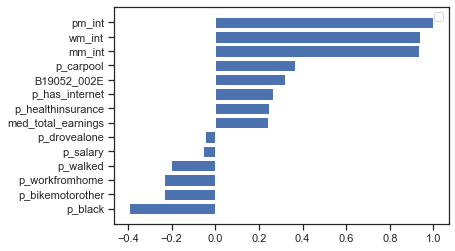

In [115]:
width = 0.8
corr_matrix_sub = corr_matrix.loc['pm_int',:].sort_values(ascending = True)
plt.barh(range(0, len(feature_list)), corr_matrix_sub, height = width, color = 'b')
#plt.bar(2, base['pm_int'], width = width, color = 'r', alpha = 0.5, label = 'Median travel time in the entire population')
plt.yticks(np.array(range(0, len(feature_list))), corr_matrix_sub.index)
plt.legend()
plt.show()



array([[<AxesSubplot:title={'center':'mm_int'}>,
        <AxesSubplot:title={'center':'wm_int'}>],
       [<AxesSubplot:title={'center':'pm_int'}>, <AxesSubplot:>]],
      dtype=object)

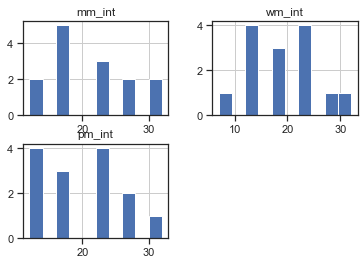

In [92]:
base[['mm_int', 'wm_int', 'pm_int']].hist()

In [ ]:
width = 0.8
plt.bar(1, base['mm_int'], width = width, color = 'b', label = 'Median travel time in male')
plt.bar(2, base['pm_int'], width = width, color = 'r', alpha = 0.5, label = 'Median travel time in the entire population')
plt.xticks(np.array([0.5, 1.5]), ['',''])
plt.legend()
plt.show()

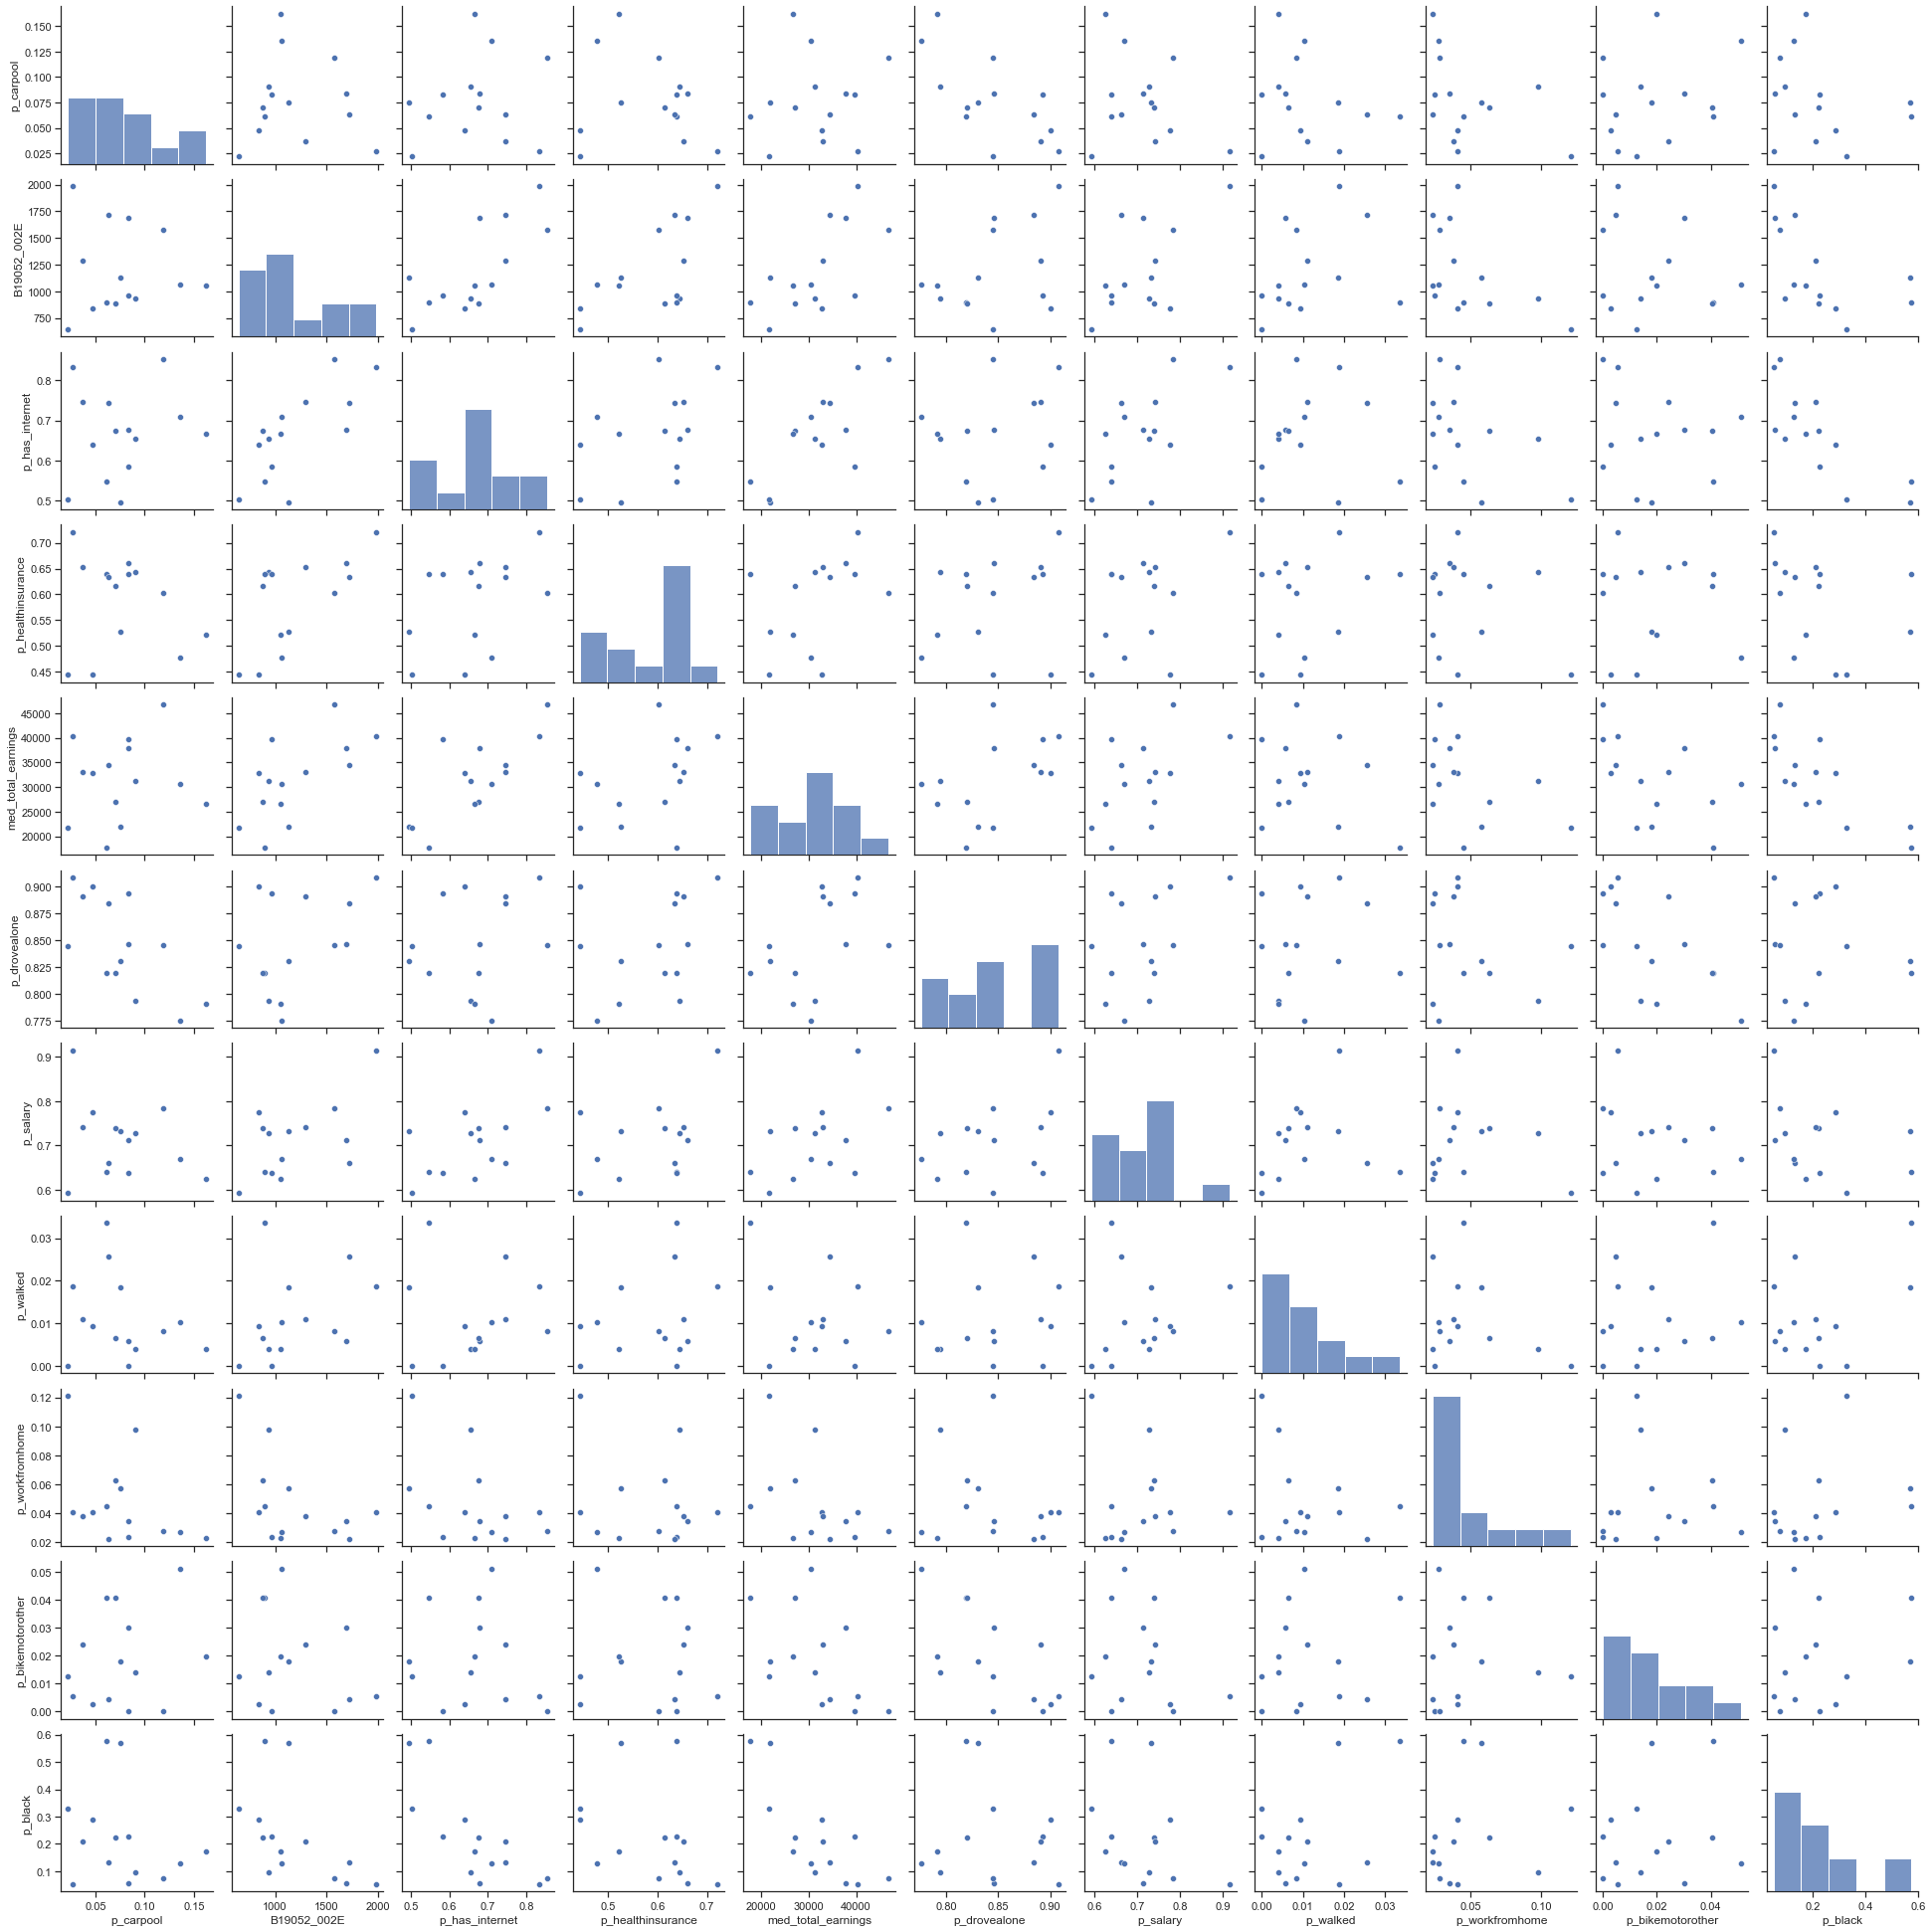

In [89]:
sns.set_theme(style="ticks")
# Define feature list
feature_list =  ['p_carpool', 'B19052_002E', 'p_has_internet', 'p_healthinsurance', 'med_total_earnings', 'p_drovealone', 'p_salary', 'p_walked', 'p_workfromhome', 'p_bikemotorother', 'p_black']

sns.pairplot(base[feature_list])

In [47]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from shapely.geometry import Point
from sklearn.linear_model import LinearRegression

In [59]:
# Define feature list
feature_list =  ['p_carpool', 'B19052_002E', 'p_has_internet', 'p_healthinsurance', 'med_total_earnings', 'p_drovealone', 'p_salary', 'p_walked', 'p_workfromhome', 'p_bikemotorother', 'p_black']

# Define features and labels 
X = base[feature_list]
y = base['pm_int']

# Standarize data
scaler = StandardScaler()  
scaler_fit = scaler.fit(X)
X_scaled = scaler_fit.transform(X)

In [85]:
base

,GEOID,geometry,NAME,state,county,tract,population_median,men_median,women_median,p_salary,...,p_drovealone,p_carpool,p_publictrans,p_walked,p_bikemotorother,p_workfromhome,p_healthinsurance,pm_int,wm_int,mm_int
0,48203020604,"POLYGON ((-10542200.570 3822928.240, -10542200...","Census Tract 206.04, Harrison County, Texas",48,203,020604,15-19,15-19,15-19,0.727061,...,0.793725,0.090120,0.0,0.004005,0.014019,0.098131,0.643678,17,17,17
1,48203020402,"POLYGON ((-10516258.230 3827513.530, -10516257...","Census Tract 204.02, Harrison County, Texas",48,203,020402,15-19,15-19,10-14,0.731912,...,0.830746,0.075113,0.0,0.018528,0.018027,0.057586,0.526763,17,12,17
2,48203020501,"POLYGON ((-10505033.890 3835034.510, -10505033...","Census Tract 205.01, Harrison County, Texas",48,203,020501,10-14,15-19,5-9,0.775322,...,0.899865,0.047361,0.0,0.009472,0.002706,0.040595,0.444844,12,7,17
3,48203020302,"POLYGON ((-10505670.970 3837985.810, -10505667...","Census Tract 203.02, Harrison County, Texas",48,203,020302,15-19,15-19,15-19,0.591912,...,0.844407,0.021867,0.0,0.000000,0.012616,0.121110,0.443804,17,17,17
4,48203020603,"POLYGON ((-10538910.080 3829652.730, -10538889...","Census Tract 206.03, Harrison County, Texas",48,203,020603,20-24,20-24,20-24,0.914747,...,0.908138,0.026819,0.0,0.018804,0.005549,0.040691,0.721281,22,22,22
5,48203020401,"POLYGON ((-10515066.110 3834885.950, -10515061...","Census Tract 204.01, Harrison County, Texas",48,203,020401,10-14,10-14,10-14,0.639286,...,0.819157,0.061472,0.0,0.033595,0.040743,0.045032,0.638902,12,12,12
6,48203020103,"POLYGON ((-10503682.240 3824785.580, -10503608...","Census Tract 201.03, Harrison County, Texas",48,203,020103,20-24,25-29,15-19,0.638538,...,0.892985,0.083234,0.0,0.000000,0.000000,0.023781,0.639614,22,17,27
7,48203020200,"POLYGON ((-10542199.010 3861433.820, -10542197...","Census Tract 202, Harrison County, Texas",48,203,020200,25-29,25-29,25-29,0.660900,...,0.883748,0.063480,0.0,0.025621,0.004589,0.022562,0.633769,27,27,27
8,48203020502,"POLYGON ((-10511655.170 3824200.700, -10511599...","Census Tract 205.02, Harrison County, Texas",48,203,020502,10-14,15-19,10-14,0.668128,...,0.775475,0.135866,0.0,0.010363,0.051238,0.027058,0.477666,12,12,17
9,48203020605,"POLYGON ((-10538076.410 3834774.760, -10538075...","Census Tract 206.05, Harrison County, Texas",48,203,020605,20-24,20-24,20-24,0.712600,...,0.846124,0.083301,0.0,0.005785,0.030081,0.034709,0.659746,22,22,22


In [40]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [41]:
# Define model
forest_reg = RandomForestRegressor(n_estimators = 300)

# Fit model
forest_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300)

In [42]:
# Predict test labels predictions
predictions = forest_reg.predict(X_test)

# Compute mean-squared-error
final_mse = mean_squared_error(y_test , predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

8.720527082269315

In [43]:
predictions = forest_reg.predict(X)


C:\Users\zenon\anaconda3\envs\gds\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [81]:
linreg = LinearRegression().fit(X, y)
linreg_prediction = linreg.predict(X)

In [78]:
coefs_arr = np.hstack([np.array([linreg.intercept_]), linreg.coef_])

In [79]:
coln = ['Intercept', 'p_carpool', 'B19052_002E', 'p_has_internet', 'p_healthinsurance', 'med_total_earnings', 'p_drovealone', 'p_salary', 'p_walked', 'p_workfromhome', 'p_bikemotorother', 'p_black']
pd.DataFrame({'Variable': coln, 'Coefficient': coefs_arr})

,Variable,Coefficient
0,Intercept,-120.549458
1,p_carpool,204.439574
2,B19052_002E,0.009534
3,p_has_internet,18.649621
4,p_healthinsurance,33.031264
5,med_total_earnings,-0.001158
6,p_drovealone,152.838647
7,p_salary,-10.264643
8,p_walked,-317.858129
9,p_workfromhome,71.637033


In [44]:
# Compute mean-squared-error
final_mse = mean_squared_error(y , predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

6.162263550311043

# VISUALIZATIONS

(0.0, 50.0)

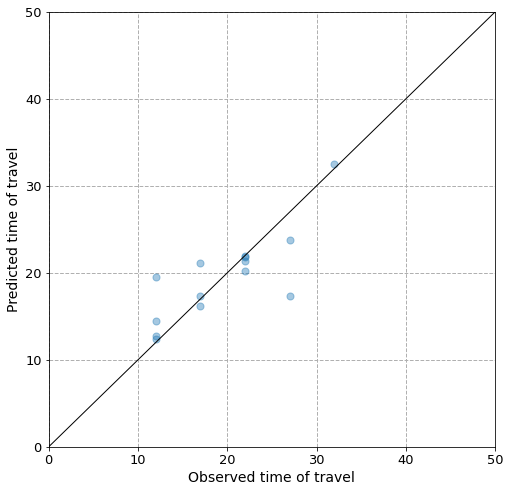

In [84]:
# Plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(y, linreg_prediction, alpha=0.4, s=50, zorder=2)
ax.plot([0, 80], [0, 80], color='k', lw=1, zorder=3)
ax.set_ylabel('Predicted time of travel', fontsize=14)
ax.set_xlabel('Observed time of travel', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.grid(ls='dashed', lw=1, zorder=1)
ax.set_ylim(0,50)
ax.set_xlim(0,50)

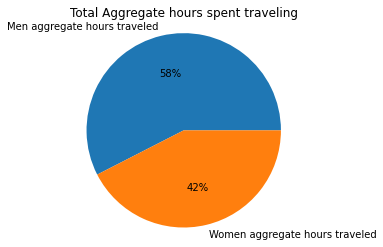

In [36]:


#width = 0.5

men_agg   = [343800.0]
women_agg = [253860.0]
pop_agg = [597665.0]

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Men aggregate hours traveled', 'Women aggregate hours traveled']
sizes = [343800.0, 253860.0]


fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%.0f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Total Aggregate hours spent traveling')
 
plt.show()